![title](logo.png)

______
# Desafio 4 - Testes de Hipóteses
_____

### Base de Dados

Utilizaremos o _data set_ **2016 Olympics in Rio de Janeiro**, que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Disponível em: https://www.kaggle.com/rio2016/olympic-games/


**Descrição dos dados:**

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. 

Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`).

As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).


### Objetivo
O objetivo deste desafio é explorar algumas funções de testes de hipóteses disponíveis em pacotes como o SciPy, aprendendo a interpretar seus resultados, ser crítico sobre seus usos e entender um pouco sobre seus funcionamentos.

> Obs.: Por favor, não modifique o nome das funções de resposta.

Requisitos
Neste desafios vamos explorar:

- Probabilidade
- Estatística
- Testes de hipóteses
- Testes A/B
_______

## _Setup_ geral

In [49]:
# importa as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [4]:
# configurações para o matplotlib.
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [5]:
# carrega o dataframe
athletes = pd.read_csv("athletes.csv")

In [6]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [7]:
# sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [14]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


#### Para validar se são significantes os resultados dos testes de hipóteses em que rejeitamos ou não a Hipótese nula ( $H_{0}$).
#### Essa função será usada nessa validação das questões abaixo.

In [63]:
def stats_significance (p_value, alpha):
    if p_value > alpha:  
        return True  # Não rejeita H0
    else: 
        return False  # Rejeita H0

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [62]:
def q1():
    alpha = 0.05  # nível de significância
    sample = get_sample(athletes, 'height', n=3000, seed=42)  # amostra
    statistic, p_value = sct.shapiro(sample)  # teste Shapiro-Wilk
    return stats_significance(p_value,alpha)

In [33]:
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

In [46]:
sample = get_sample(athletes, 'height', n=3000, seed=42)
statistic, p_value = sct.shapiro(sample)
statistic, p_value

(0.9961519837379456, 5.681722541339695e-07)

- Plote o histograma dessa variável (com, por exemplo, bins=25)

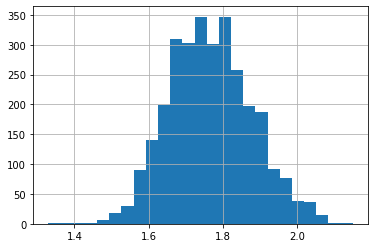

In [60]:
sample.hist(bins=25)

Quando  $H_{0}$ é realmente falsa, a distribuição do valor-p depende do poder do teste, ou seja, da capacidade do teste de detectar uma   $H_{0}$  falsa. 

Neste caso, o gráfico nos mostra o poder do teste em detectar que  $H_{0}$ é falsa. 

Do contrário, se  $H_{0}$ fosse realmente verdadeira, o valor-p teria distribuição uniforme.

- Plote o qq-plot para essa variável e a analise

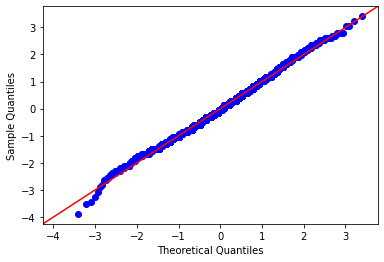

In [50]:
# gera o qq-plot
sm.qqplot(sample, fit=True, line="45");

O qq-plot é um gráfico para comparação de distribuições de probabilidades, para sabermos se as duas distribuições são iguais ou parecidas.

Quanto mais alinhados os pontos estiverem em cima da reta, mais a distribuição da amostra se aproxima da distribuição teórica.

Em nosso caso, pelo gráfico observamos que a distribuição da nossa amostra se aproxima de uma distribuição normal o que distingue dos demais testes estatísticos.

- Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado p-value hacking, e não é legal).

In [91]:
# considerando um nível de significância de 0,00001% teriamos um resultado "favorável"
alpha = 0.0000001  # nível de significância
sample = get_sample(athletes, 'height', n=3000, seed=42)  # amostra
statistic, p_value = sct.shapiro(sample)  # teste Shapiro-Wilk
result = stats_significance(p_value,alpha)
result

True

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [101]:
def q2():
    alpha = 0.05  # nível de significância
    sample = get_sample(athletes, 'height', n=3000, seed=42)  # amostra
    statistic, p_value = sct.jarque_bera(sample)  # teste Jarque-Bera
    return stats_significance(p_value,alpha)

In [102]:
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

Sim, o histograma mostra a ausência de caudas, o teste de Jarque-Bera é um teste de aderência à distribuição normal com  $H_{0}$  sendo a normalidade dos dados. 

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [38]:
def q3():
    alpha = 0.05  # nível de significância
    sample = get_sample(athletes, 'weight', n=3000, seed=42)  # amostra
    statistic, p_value = sct.normaltest(sample)  # teste D'Agostino-Pearson
    return stats_significance(p_value,alpha)

In [39]:
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

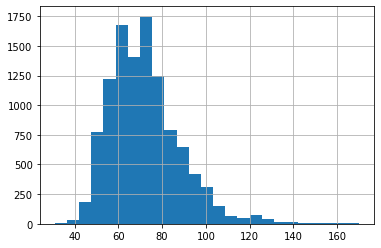

In [112]:
# histograma
athletes['weight'].hist(bins=25);

Como pode ser visto no gráfico é possível verificar uma cauda a direita e uma certa assimetria, então os testes feitos são condizentes.

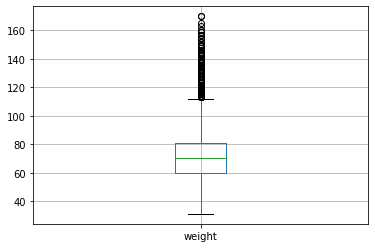

In [113]:
# boxplot
athletes.boxplot(column=['weight']);

Podemos observar a presença de muitos outliers superiores, o que vai de encontro o que foi observado no histograma mostrando a assimetria da distribuição.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [42]:
def q4():
    alpha = 0.05  # nível de significância   
    athletes['weight_log'] = np.log(athletes['weight'])  # cria uma coluna com a transformação logarítmica
    sample = get_sample(athletes,'weight_log', n=3000, seed=42)  # amostra
    statistic, p_value = sct.normaltest(sample)  # teste D'Agostino-Pearson
    return stats_significance(p_value,alpha)

In [43]:
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

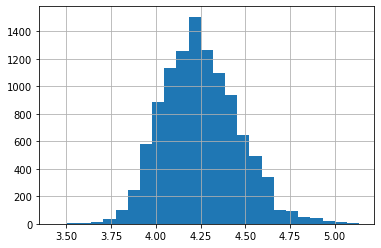

In [114]:
# histograma
athletes['weight'] = np.log(athletes['weight'])
athletes['weight'].hist(bins=25);

#### Para resolução das questões 5, 6 e 7 a seguir considere os itens abaixo:

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

> __Filtrar o _data set_ por nacionalidade dos atletas: brasileiros (bra), norte-americanos(usa) e canadenses (can) e suas alturas__.

In [153]:
# filtra por nacionalidade e retira os campos nulos
bra = athletes.loc[athletes['nationality'] == 'BRA', 'height'].dropna()  
usa = athletes.loc[athletes['nationality'] == 'USA', 'height'].dropna()  
can = athletes.loc[athletes['nationality'] == 'CAN', 'height'].dropna()  

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [154]:
def q5():
    alpha = 0.05  # nível de significância   
    statistic, p_value = sct.ttest_ind(bra, usa, equal_var=False)  # teste de média 
    return stats_significance(p_value,alpha)

In [155]:
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [156]:
def q6():
    alpha = 0.05  # nível de significância   
    statistic, p_value = sct.ttest_ind(bra, can, equal_var=False)  # teste de média 
    return stats_significance(p_value,alpha)

In [157]:
q6()

True

In [159]:
alpha = 0.05  # nível de significância   
statistic, p_value = sct.ttest_ind(bra, can, equal_var=False)  # teste de média 
statistic, p_value

(0.638930491436537, 0.5230827295443041)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [35]:
def q7():
    alpha = 0.05  # nível de significância   
    statistic, p_value = sct.ttest_ind(usa, can, equal_var=False)  # teste de média 
    return float(round(p_value, 8))

In [37]:
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido? 
* Você consegue interpretar esse p-valor? 
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

Sim, faz sentido conforme podemos observar nos histogramas abaixo.

A um nível de 5% com um p_valor menor que 5% podemos rejeitar a hipóstese nula. 

In [131]:
# histograma
# filtra por nacionalidade e retira os campos nulos
usa = athletes[(athletes['nationality'] == 'USA')]
bra = athletes[(athletes['nationality'] == 'BRA')]
can = athletes[(athletes['nationality'] == 'CAN')]

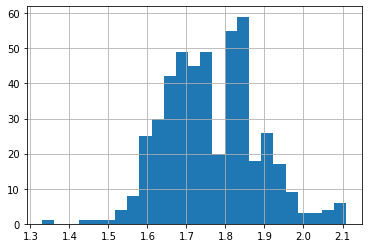

In [146]:
# histograma
bra['height'].hist(bins=25)

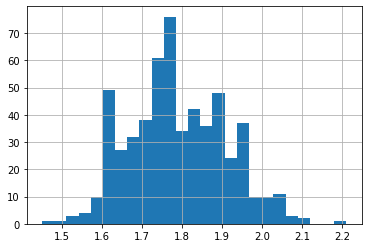

In [145]:
usa['height'].hist(bins=25)

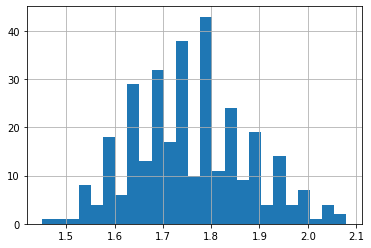

In [144]:
can['height'].hist(bins=25)

_________
## Conclusão
________

Aprendemos os diversos tipos de testes estatísticos para o teste de normalidade, com o intuito de verificar se uma dada uma amostra veio ou não de uma distribuição normal.

Em um teste de hipóteses, formulamos duas hipóteses complementares a respeito de um parâmetro populacional de interesse chamadas hipótese nula (null hypothesis) e hipótese alternativa (alternative hypothesis). 

Denotamos a hipótese nula por $H_{0}$ e a hipótese alternativa por $H_{1}$ .

Vimos que o p_valor é a probabilidade de $H_{0}$ ser verdadeira. No caso, dessa probabilidade for muito baixa é muito raro que $H_{0}$ seja realmente verdadeira, por outro lado se for alto podemos concluir que deve ser razoável que $H_{0}$ é verdadeira. 

O contéudo da aceleração foi apenas introdutório, os próximos passos e entender mais a fundo a teoria.